In [135]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [136]:
!git clone https://github.com/balrks/linear-poly-rice-model.git

fatal: destination path 'linear-poly-rice-model' already exists and is not an empty directory.


In [137]:
df = pd.read_csv('/content/linear-poly-rice-model/data_harga_beras_2020_2024.csv')
df

,Date,Semua Provinsi,Aceh,Kota Lhokseumawe
0,2020-01-01,11800.0,10300.0,10000.0
1,2020-01-02,11800.0,10300.0,10000.0
2,2020-01-03,11850.0,10300.0,10000.0
3,2020-01-06,11800.0,10350.0,10000.0
4,2020-01-07,11800.0,10350.0,10000.0
...,...,...,...,...
1213,2024-08-26,15350.0,13900.0,13450.0
1214,2024-08-27,15350.0,13900.0,13450.0
1215,2024-08-28,15250.0,13900.0,13450.0
1216,2024-08-29,15300.0,13900.0,13450.0


In [138]:
# Load the data from the CSV file
df = pd.read_csv('/content/linear-poly-rice-model/data_harga_beras_2020_2024.csv')

# Mengubah kolom 'date' menjadi format datetime
df['Date'] = pd.to_datetime(df['Date'])

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              1218 non-null   datetime64[ns]
 1   Semua Provinsi    1218 non-null   float64       
 2   Aceh              1218 non-null   float64       
 3   Kota Lhokseumawe  1218 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 38.2 KB


In [140]:
# Check missing values
df.isnull().sum()

,0
Date,0
Semua Provinsi,0
Aceh,0
Kota Lhokseumawe,0


In [141]:
# Mengurutkan DataFrame berdasarkan kolom 'date'
df = df.sort_values(by='Date')

# Memberikan urutan berurutan mulai dari 1
df['Date'] = range(1, len(df) + 1)

# Mengonversi kolom 'urutan' menjadi tipe data integer (int64)
df['Date'] = df['Date'].astype('int64')

In [142]:
# # 6. Prepare data for regression
X = df['Date'].values.reshape(-1, 1)  # Independent variable
Y = df['Kota Lhokseumawe'].values     # Dependent variable

In [143]:
# Pisahkan data menjadi data pelatihan dan data pengujian
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [144]:
# Fit the Linear Regression model on the train data
linear = LinearRegression()
model_linear = linear.fit(X_train, Y_train)

# # # Print the coefficients and the intercept of the model
print('Nilai intercept (a): ',linear.intercept_)
print('Nilai slope (b): ',linear.coef_)

Nilai intercept (a):  8805.79649552436
Nilai slope (b):  [3.62721857]


In [145]:
# Initialize PolynomialFeatures
poly_2 = PolynomialFeatures(degree=2)

X_train_poly_2 = poly_2.fit_transform(X_train)

poly_2_model = LinearRegression()
poly_2_model.fit(X_train_poly_2, Y_train)

# Print the coefficients and the intercept
print('Nilai Intercept:', poly_2_model.intercept_)
print("Nilai slope:", poly_2_model.coef_)


Nilai Intercept: 9947.783130437068
Nilai slope: [ 0.         -2.0219701   0.00463403]


In [146]:
# Initialize PolynomialFeatures
poly_3 = PolynomialFeatures(degree=3)

X_train_poly_3 = poly_3.fit_transform(X_train)

poly_3_model = LinearRegression()
poly_3_model.fit(X_train_poly_3, Y_train)

# Print the coefficients and the intercept
print('Nilai Intercept:', poly_3_model.intercept_)
print("Nilai slope:", poly_3_model.coef_)


Nilai Intercept: 10293.254164805698
Nilai slope: [ 0.00000000e+00 -5.47311619e+00  1.17225001e-02 -3.87524452e-06]


In [114]:
# Initialize PolynomialFeatures
poly_4 = PolynomialFeatures(degree=4)

X_train_poly_4 = poly_4.fit_transform(X_train)

poly_4_model = LinearRegression()
poly_4_model.fit(X_train_poly_4, Y_train)

# Print the coefficients and the intercept
print('Nilai Intercept:', poly_4_model.intercept_)
print("Nilai slope:", poly_4_model.coef_)


Nilai Intercept: 9731.313125044031
Nilai slope: [ 0.00000000e+00  3.98026709e+00 -2.34633746e-02  4.12228435e-05
 -1.85505646e-08]


In [119]:
# Initialize PolynomialFeatures
poly_5 = PolynomialFeatures(degree=5)

X_train_poly_5 = poly_5.fit_transform(X_train)

poly_5_model = LinearRegression()
poly_5_model.fit(X_train_poly_5, Y_train)

# Print the coefficients and the intercept
print('Nilai Intercept:', poly_5_model.intercept_)
print("Nilai slope:", poly_5_model.coef_)


Nilai Intercept: 9902.910107716594
Nilai slope: [ 0.00000000e+00 -7.29617638e-06 -1.47187878e-03 -5.64689117e-06
  2.39139853e-08 -1.37466803e-11]


In [116]:
# Prediksi dan evaluasi model regresi polinomial
Y_pred_poly_2 = poly_2_model.predict(poly_2.transform(X_test))

# Menghitung metrik evaluasi
mae_poly_2 = mean_absolute_error(Y_test, Y_pred_poly_2)
rmse_poly_2 = np.sqrt(np.mean((Y_test - Y_pred_poly_2) ** 2))
mape_poly_2 = np.mean(np.abs((Y_test - Y_pred_poly_2) / Y_test)) * 100

# Menampilkan hasil
print(f"MAE (Polynomial Regression): {mae_poly_2:.4f}")
print(f"RMSE (Polynomial Regression): {rmse_poly_2:.4f}")
print(f"MAPE (Polynomial Regression): {mape_poly_2:.2f}%")

MAE (Polynomial Regression): 286.4987
RMSE (Polynomial Regression): 359.5456
MAPE (Polynomial Regression): 2.54%


In [117]:
# Prediksi dan evaluasi model regresi polinomial
Y_pred_poly_3 = poly_3_model.predict(poly_3.transform(X_test))

# Menghitung metrik evaluasi
mae_poly_3 = mean_absolute_error(Y_test, Y_pred_poly_3)
rmse_poly_3 = np.sqrt(np.mean((Y_test - Y_pred_poly_3) ** 2))
mape_poly_3 = np.mean(np.abs((Y_test - Y_pred_poly_3) / Y_test)) * 100

# Menampilkan hasil
print(f"MAE (Polynomial Regression): {mae_poly_3:.4f}")
print(f"RMSE (Polynomial Regression): {rmse_poly_3:.4f}")
print(f"MAPE (Polynomial Regression): {mape_poly_3:.2f}%")

MAE (Polynomial Regression): 280.4348
RMSE (Polynomial Regression): 345.9238
MAPE (Polynomial Regression): 2.53%


In [118]:
# Prediksi dan evaluasi model regresi polinomial
Y_pred_poly_4 = poly_4_model.predict(poly_4.transform(X_test))

# Menghitung metrik evaluasi
mae_poly_4 = mean_absolute_error(Y_test, Y_pred_poly_4)
rmse_poly_4 = np.sqrt(np.mean((Y_test - Y_pred_poly_4) ** 2))
mape_poly_4 = np.mean(np.abs((Y_test - Y_pred_poly_4) / Y_test)) * 100

# Menampilkan hasil
print(f"MAE (Polynomial Regression): {mae_poly_4:.4f}")
print(f"RMSE (Polynomial Regression): {rmse_poly_4:.4f}")
print(f"MAPE (Polynomial Regression): {mape_poly_4:.2f}%")

MAE (Polynomial Regression): 205.2276
RMSE (Polynomial Regression): 284.8757
MAPE (Polynomial Regression): 1.85%


In [121]:
# Prediksi dan evaluasi model regresi polinomial
Y_pred_poly_5 = poly_5_model.predict(poly_5.transform(X_test))

# Menghitung metrik evaluasi
mae_poly_5 = mean_absolute_error(Y_test, Y_pred_poly_5)
rmse_poly_5 = np.sqrt(np.mean((Y_test - Y_pred_poly_5) ** 2))
mape_poly_5 = np.mean(np.abs((Y_test - Y_pred_poly_5) / Y_test)) * 100

# Menampilkan hasil
print(f"MAE (Polynomial Regression): {mae_poly_5:.4f}")
print(f"RMSE (Polynomial Regression): {rmse_poly_5:.4f}")
print(f"MAPE (Polynomial Regression): {mape_poly_5:.2f}%")

MAE (Polynomial Regression): 210.2480
RMSE (Polynomial Regression): 281.0235
MAPE (Polynomial Regression): 1.90%


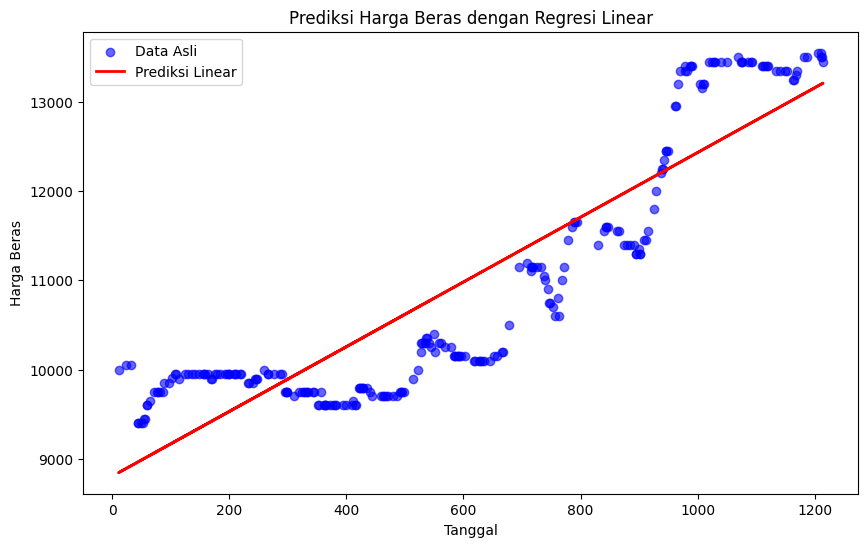

In [147]:
import matplotlib.pyplot as plt

# Prediksi dengan model regresi linear
Y_pred_linear = model_linear.predict(X_test)

# Membuat grafik
plt.figure(figsize=(10, 6))

# Plot data asli
plt.scatter(X_test, Y_test, color='blue', label='Data Asli', alpha=0.6)

# Plot prediksi regresi linear
plt.plot(X_test, Y_pred_linear, color='red', label='Prediksi Linear', linewidth=2)

# Menambahkan judul dan label
plt.title('Prediksi Harga Beras dengan Regresi Linear')
plt.xlabel('Tanggal')
plt.ylabel('Harga Beras')
plt.legend()

# Menampilkan grafik
plt.show()


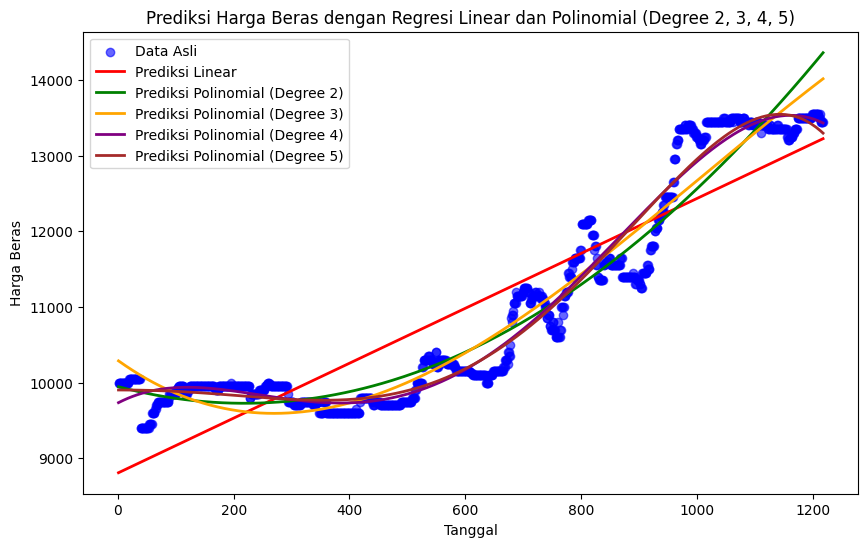

In [150]:
import numpy as np
import matplotlib.pyplot as plt

# Membuat rentang nilai X yang lebih halus
X_smooth = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)

# Prediksi menggunakan model regresi linear
Y_pred_linear_smooth = model_linear.predict(X_smooth)

# Prediksi menggunakan model regresi polinomial derajat 2
Y_pred_poly_2_smooth = poly_2_model.predict(poly_2.transform(X_smooth))

# Prediksi menggunakan model regresi polinomial derajat 3
Y_pred_poly_3_smooth = poly_3_model.predict(poly_3.transform(X_smooth))

# Prediksi menggunakan model regresi polinomial derajat 4
Y_pred_poly_4_smooth = poly_4_model.predict(poly_4.transform(X_smooth))

# Prediksi menggunakan model regresi polinomial derajat 5
Y_pred_poly_5_smooth = poly_5_model.predict(poly_5.transform(X_smooth))

# Membuat grafik
plt.figure(figsize=(10, 6))

# Plot data asli
plt.scatter(X, Y, color='blue', label='Data Asli', alpha=0.6)

# Plot prediksi regresi linear (dengan satu garis halus)
plt.plot(X_smooth, Y_pred_linear_smooth, color='red', label='Prediksi Linear', linewidth=2)

# Plot prediksi regresi polinomial derajat 2 (dengan satu garis halus)
plt.plot(X_smooth, Y_pred_poly_2_smooth, color='green', label='Prediksi Polinomial (Degree 2)', linewidth=2)

# Plot prediksi regresi polinomial derajat 3 (dengan satu garis halus)
plt.plot(X_smooth, Y_pred_poly_3_smooth, color='orange', label='Prediksi Polinomial (Degree 3)', linewidth=2)

# Plot prediksi regresi polinomial derajat 4 (dengan satu garis halus)
plt.plot(X_smooth, Y_pred_poly_4_smooth, color='purple', label='Prediksi Polinomial (Degree 4)', linewidth=2)

# Plot prediksi regresi polinomial derajat 5 (dengan satu garis halus)
plt.plot(X_smooth, Y_pred_poly_5_smooth, color='brown', label='Prediksi Polinomial (Degree 5)', linewidth=2)

# Menambahkan judul dan label
plt.title('Prediksi Harga Beras dengan Regresi Linear dan Polinomial (Degree 2, 3, 4, 5)')
plt.xlabel('Tanggal')
plt.ylabel('Harga Beras')
plt.legend()

# Menampilkan grafik
plt.show()
